<a href="https://colab.research.google.com/github/ASingh-AGH/AI_Collab/blob/main/IAI%20MarketBasketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis & the APRIORI Algorithm

During the previous class, we discussed clustering methods as examples of unsupervised machine learning. Today, we will also group elements, but our goal will be slightly different — to discover association rules that show the relationships between data items.

A typical example of a data set for association rule mining is the set of transactions that consists of lists of items bought in the store by various customers. Based on that, we would like to know, which products are commonly bought together or which items a customer might want if choose a particular product. Such knowledge might be later used to recommend some products or create some promotion sets of products.

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend import preprocessing

Let's follow the toy example with five labels. 

The calculations for this example can be found on: https://www.datacamp.com/community/tutorials/market-basket-analysis-r.

In [ ]:
toy_example = [['l1','l2'],
               ['l2','l3','l4','l5'],
               ['l2','l3'],
               ['l1'],
               ['l1','l2','l3']]

In this lab, we will use the `apriori` algorithm implementation from `mlxtend`: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/.

For this purpose, we need the data in a one-hot encoded data frame. 

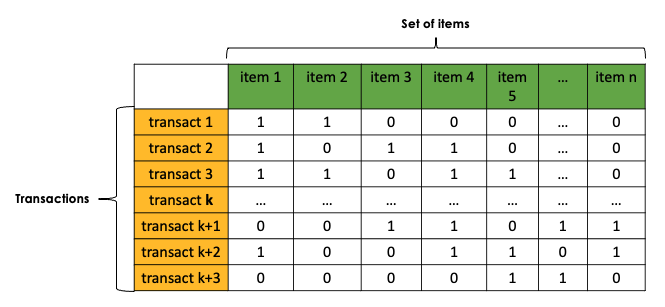

First let's use transaction encoder and then tranform it into pandas DataFrame.

In [ ]:
encode_=preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(toy_example)
print(encode_arr)

[[ True  True False False False]
 [False  True  True  True  True]
 [False  True  True False False]
 [ True False False False False]
 [ True  True  True False False]]


In [ ]:
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,l1,l2,l3,l4,l5
0,True,True,False,False,False
1,False,True,True,True,True
2,False,True,True,False,False
3,True,False,False,False,False
4,True,True,True,False,False


First, we will find all frequent item-sets with `support` greater or equal to some specified   `min_support`:

In [ ]:
frequent_itemsets = apriori(encode_df, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(l1)
1,0.8,(l2)
2,0.6,(l3)
3,0.4,"(l1, l2)"
4,0.6,"(l3, l2)"


If we would like to check the support for a particular set of items, we can take advantage of 
selecting entries using the Pandas API:

In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'l1','l2'} ] #PARTICULAR SET

,support,itemsets
3,0.4,"(l1, l2)"


Based on these frequent item-sets, we can list all association rules for which the appropriate metrics are above some pre-determined thresholds: 

In [ ]:
rules=association_rules(frequent_itemsets, metric="confidence",min_threshold=0.5,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(l1),(l2),0.6,0.8,0.4,0.666667,0.833333,-0.08,0.6
1,(l2),(l1),0.8,0.6,0.4,0.500000,0.833333,-0.08,0.8
2,(l2),(l3),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
3,(l3),(l2),0.6,0.8,0.6,1.000000,1.250000,0.12,inf


In [ ]:
rules[['antecedents','consequents','confidence']].sort_values('confidence', ascending=False) #SORTED

,antecedents,consequents,confidence
3,(l3),(l2),1.000000
2,(l2),(l3),0.750000
0,(l1),(l2),0.666667
1,(l2),(l1),0.500000


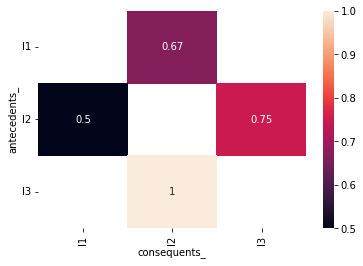

In [ ]:
rules['antecedents_'] = rules['antecedents'].apply(lambda s: ','.join(list(s))).astype("unicode")
rules['consequents_'] = rules['consequents'].apply(lambda s: ','.join(list(s))).astype("unicode")
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules.pivot(index='antecedents_', columns='consequents_', values='confidence')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Check how many association rules you can discover if you change minimum support and confidence thresholds.

 ## Exercise



Using the learned unsupervised learning algorithms, analyze the groceries dataset:

In [ ]:
!wget -nc http://home.agh.edu.pl/kluza/groceries.csv

File ‘groceries.csv’ already there; not retrieving.



**In the report answer the following questions about the dataset from `groceries.csv`:**
* **How many products and transactions are there in this dataset?**
* **Which are the five most popular products (top selling items) in the store?**
* **Discover some association rules and decide which one are the strongest ones. To better chose of the strong rules you might take into account various metrics such as `support`, `confidence`, `lift`, `leverage`	or `conviction`.** <br> (see: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)
* **Based on your Market Basket Analysis, propose and justify some promotions or recommendations which the seller could introduce to their shop to support the customers.**

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend import preprocessing
import numpy as np

In [ ]:
data=pd.read_csv('groceries.csv', names=np.arange(33))

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
val_list = data.values.astype(str).tolist()
val_list = [[item for item in row if (str(item) != 'nan') & (item!='')] for row in val_list]
list_sorted = []
for item in val_list:
  item.sort()
  list_sorted.append(item)

list_sorted[:3]

[['citrus fruit', 'margarine', 'ready soups', 'semi-finished bread'],
 ['coffee', 'tropical fruit', 'yogurt'],
 ['whole milk']]

In [ ]:
encode_=preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(list_sorted)
# print(encode_arr)
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(f"Total Products: {encode_df[1]}") # total products


KeyError: ignored

In [ ]:
print('Frequently Purchased 5-Items')
frequent_itemsets = apriori(encode_df, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending = False)[:5]

Frequently Purchased 5-Items


,support,itemsets
85,0.255516,(whole milk)
55,0.193493,(other vegetables)
65,0.183935,(rolls/buns)
74,0.174377,(soda)
86,0.139502,(yogurt)


In [ ]:
rules=association_rules(frequent_itemsets, metric="confidence",min_threshold=0.01,support_only=False)
rules[['support','confidence','lift','conviction','antecedents','consequents', 'leverage']].sort_values(by= 'support', ascending=False).head(10)

,support,confidence,lift,conviction,antecedents,consequents,leverage
303,0.074835,0.386758,1.513634,1.214013,(other vegetables),(whole milk),0.025394
302,0.074835,0.292877,1.513634,1.140548,(whole milk),(other vegetables),0.025394
358,0.056634,0.307905,1.205032,1.075696,(rolls/buns),(whole milk),0.009636
359,0.056634,0.221647,1.205032,1.048452,(whole milk),(rolls/buns),0.009636
425,0.056024,0.219260,1.571735,1.102157,(whole milk),(yogurt),0.020379
424,0.056024,0.401603,1.571735,1.244132,(yogurt),(whole milk),0.020379
372,0.048907,0.191405,1.756031,1.101913,(whole milk),(root vegetables),0.021056
373,0.048907,0.448694,1.756031,1.350401,(root vegetables),(whole milk),0.021056
282,0.047382,0.434701,2.246605,1.426693,(root vegetables),(other vegetables),0.026291
283,0.047382,0.244877,2.246605,1.179941,(other vegetables),(root vegetables),0.026291


In [ ]:
data.sample(n=10)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
391,shopping bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5328,sliced cheese,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7331,herbs,whipped/sour cream,semi-finished bread,chewing gum,newspapers,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2213,chicken,beef,citrus fruit,tropical fruit,pip fruit,root vegetables,other vegetables,whole milk,rolls/buns,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5723,chicken,pip fruit,whole milk,rolls/buns,brown bread,pastry,semi-finished bread,margarine,bottled water,newspapers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8893,yogurt,bottled water,white wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7038,hamburger meat,citrus fruit,root vegetables,other vegetables,ice cream,domestic eggs,rolls/buns,white bread,canned beer,long life bakery product,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9736,frankfurter,rolls/buns,fruit/vegetable juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5830,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,dog food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


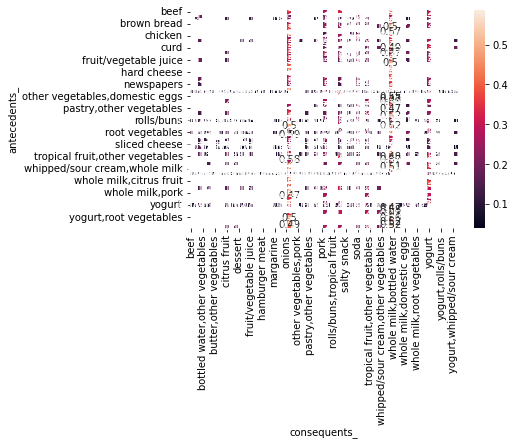

In [ ]:
rules['antecedents_'] = rules['antecedents'].apply(lambda s: ','.join(list(s))).astype("unicode")
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules.pivot(index='antecedents_', columns='consequents_', values='confidence')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()